# O que vende um carro?

Nesse projeto irei fazer uma analise investigando quais fatores influenciam no valor de um carro.

## Iniciação

In [1]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os Dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv( 'vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada



In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.shape

(51525, 13)

In [5]:
# imprima uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Analisando as informações gerais e uma amostra dos dados, vemos que ele possui diversos problemas de dados ausentes, problemas de categorização e colunas com tipos de dados inadequados.

In [6]:
# Conferindo as colunas com valores ausentes
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Vemos tambem que algumas colunas deveriam estar em int para melhor analise, mas estão em float.

In [7]:
df['model_year'].dtype

dtype('float64')

In [8]:
df['cylinders'].value_counts()

cylinders
8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: count, dtype: int64

In [9]:
df['odometer'].dtype

dtype('float64')

In [10]:
df['is_4wd'].value_counts()
# Nessa coluna, os valores que deveriam sinalizar se é 'false' aparentam estar ausentes ao inves de estarem em um sistema numerico binario

is_4wd
1.0    25572
Name: count, dtype: int64

Apenas algumas colunas possuem valores ausentes explicitos, sendo a coluna 'is_4wd' com maior quantidade.

### Conclusões e próximos passos

Os proximos passos serão analisar os dados com valores ausentes e decidir o que fazer com eles.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [12]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

## Cuide dos valores ausentes (se houver algum)

Na coluna 'model_year' existe diversos valores faltantes, se tratando de uma coluna que influencia fortemente no valor dos carros ela não deve ser substituida.

Dito isso, minha decisão será de remover as linhas que possuem valores ausentes na coluna 'model_year', os principais motivos são:

- O ano do modelo do carro influencia fortemente em seu valor, não podendo ser desconsiderado
- A substituição dos valores ausentes é aparente ser extremamente arriscada, já que não temos dados em outras tabelas que nós dão essa informação de forma precisa.
- Por se tratar de uma pequena porcentagem dos dados e ser uma caracteristica que influencia fortemente no valor dos carros.

In [13]:
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [14]:
df['model'].value_counts()

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

In [15]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [16]:
df = df.dropna(axis=0, subset=['model_year'])

In [17]:
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        4897
fuel                0
odometer         7343
transmission        0
type                0
paint_color      8615
is_4wd          24142
date_posted         0
days_listed         0
dtype: int64

### Verificando os valores ausentes em cylinders

Existe alguns valores faltantes na coluna cylinders. 
Com um pouco de analise, eu decidi substituir esses valores faltantes por valores presentes em carros do mesmo modelo e ano. 
Com isso, ainda restaram 228 valores faltantes, por se tratar de um número irrisório, eu decidi apenas remove-los.

In [18]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [19]:
df['cylinders'] = df.groupby(['model_year', 'model'])['cylinders'].fillna(method='ffill')

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_776\697370134.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'] = df.groupby(['model_year', 'model'])['cylinders'].fillna(method='ffill')


In [20]:
df['cylinders'].value_counts()

cylinders
8.0     16291
6.0     16174
4.0     14325
10.0      575
5.0       274
3.0        35
12.0        4
Name: count, dtype: int64

In [21]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39844,8500,1977.0,chevrolet silverado,good,NaN,gas,105000.0,automatic,pickup,NaN,1.0,2018-12-09,53
39952,1900,1990.0,toyota camry,good,NaN,gas,156481.0,automatic,sedan,NaN,NaN,2018-09-29,43
43595,5995,1988.0,jeep wrangler,good,NaN,gas,100309.0,manual,SUV,white,1.0,2018-08-17,12
44132,1500,1999.0,volkswagen jetta,fair,NaN,gas,235000.0,manual,sedan,red,NaN,2018-07-27,29


In [22]:
df.dropna(axis=0, subset=['cylinders'], inplace=True)

In [23]:
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7305
transmission        0
type                0
paint_color      8568
is_4wd          24017
date_posted         0
days_listed         0
dtype: int64

### Verificando a coluna 'odometer'

Analisando os valores ausentes na coluna, eu decidi por remove-los. Os motivos são:

- A quantidade de KM rodados em um carro afeta diretamente o seu valor
- Os KM rodados ausentes são extremamente dificieis de serem substituidos e se forem de forma incorreta, podem inviezar o resultado da analise final
- A quantidade de valores ausentes nessa coluna, apesar de não serem insignificantes, não são grande em comparação aos dados presentes no DF.

In [24]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [25]:
df.dropna(axis=0, subset=['odometer'], inplace=True)

df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color      7216
is_4wd          20310
date_posted         0
days_listed         0
dtype: int64

### Verificando valores ausentes na coluna paint_color

Em minha visão a cor do carro não afetá de forma significativa o valor do carro. 

Dito isso, eu irei substituir os valores ausentes por uma string 'not specified'.

In [26]:
df[df['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,NaN,2018-09-13,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012.0,chevrolet traverse,good,6.0,gas,144500.0,automatic,SUV,NaN,1.0,2019-03-05,1
51496,4999,2002.0,toyota 4runner,excellent,6.0,gas,177901.0,automatic,SUV,NaN,1.0,2018-05-26,59
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73


In [27]:
df['paint_color'].fillna('not specified', inplace=True)

In [28]:
df[df['paint_color'] == 'not specified']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not specified,1.0,2018-06-23,19
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,not specified,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,not specified,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,not specified,NaN,2018-08-22,8
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,not specified,NaN,2018-09-13,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012.0,chevrolet traverse,good,6.0,gas,144500.0,automatic,SUV,not specified,1.0,2019-03-05,1
51496,4999,2002.0,toyota 4runner,excellent,6.0,gas,177901.0,automatic,SUV,not specified,1.0,2018-05-26,59
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,not specified,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,not specified,NaN,2019-02-27,73


In [29]:
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          20310
date_posted         0
days_listed         0
dtype: int64

### Verificando os valores ausentes em 'is_4wd'

Analisando a coluna, o motivo dos erros aparenta ser que os valores que deveriam especificar que não é um carro 4x4 não foram preenchidos.

Dito isso, eu irei substituir os valores ausentes na coluna por 0.

In [30]:
df[df['is_4wd'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
13,16500,2018.0,hyundai sonata,excellent,4.0,gas,22104.0,automatic,sedan,silver,NaN,2019-01-14,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32


In [31]:
df['is_4wd'].value_counts()

is_4wd
1.0    20063
Name: count, dtype: int64

In [32]:
df['is_4wd'].fillna(0, inplace=True)

In [33]:
df['is_4wd'].value_counts()

is_4wd
0.0    20310
1.0    20063
Name: count, dtype: int64

## Corrija os tipos de dados

In [34]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not specified,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32


### corrijindo os valores em model_year

In [35]:
df['model_year'].dtype

dtype('float64')

In [36]:
df['model_year'] = pd.to_numeric(df['model_year'], downcast='integer')

In [37]:
df['model_year'].dtype

dtype('int16')

### alterando o tipo de dados em 'cylinders'


In [38]:
df['cylinders'].dtype

dtype('float64')

In [39]:
df['cylinders'] = pd.to_numeric(df['cylinders'], downcast='integer')

In [40]:
df['cylinders'].dtype

dtype('int8')

### alterando o tipo de dados da coluna odometer

In [41]:
df['odometer'].dtype

dtype('float64')

In [42]:
df['odometer'] = pd.to_numeric(df['odometer'], downcast='integer')

In [43]:
df['odometer'].dtype

dtype('int32')

### alterando o tipo de dados da coluna is_4wd

In [44]:
df['is_4wd'].dtype

dtype('float64')

In [45]:
df['is_4wd'] = pd.to_numeric(df['is_4wd'], downcast='integer')

In [46]:
df['is_4wd'].dtype

dtype('int8')

## Enriqueça os dados

In [47]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not specified,1,2018-06-23,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,0,2018-08-10,63
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32


In [48]:
df.reset_index(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40373 entries, 0 to 40372
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         40373 non-null  int64 
 1   price         40373 non-null  int64 
 2   model_year    40373 non-null  int16 
 3   model         40373 non-null  object
 4   condition     40373 non-null  object
 5   cylinders     40373 non-null  int8  
 6   fuel          40373 non-null  object
 7   odometer      40373 non-null  int32 
 8   transmission  40373 non-null  object
 9   type          40373 non-null  object
 10  paint_color   40373 non-null  object
 11  is_4wd        40373 non-null  int8  
 12  date_posted   40373 non-null  object
 13  days_listed   40373 non-null  int64 
dtypes: int16(1), int32(1), int64(3), int8(2), object(7)
memory usage: 3.4+ MB


### Transformando as colunas 'date_posted' e 'model_year' em datetime e transformando 'days_listed' em timedelta

Eu irei criar uma nova coluna com a idade do carro, para isso eu tive que modificar o formato das três colunas abaixo.

In [50]:
# Adicione valores data/hora para quando a propaganda estiver colocada

df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d') 

In [51]:
df['model_year'] = pd.to_datetime(df['model_year'], format='%Y')

In [52]:
df['days_listed'] = pd.to_timedelta(df['days_listed'], unit='D')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40373 entries, 0 to 40372
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   index         40373 non-null  int64          
 1   price         40373 non-null  int64          
 2   model_year    40373 non-null  datetime64[ns] 
 3   model         40373 non-null  object         
 4   condition     40373 non-null  object         
 5   cylinders     40373 non-null  int8           
 6   fuel          40373 non-null  object         
 7   odometer      40373 non-null  int32          
 8   transmission  40373 non-null  object         
 9   type          40373 non-null  object         
 10  paint_color   40373 non-null  object         
 11  is_4wd        40373 non-null  int8           
 12  date_posted   40373 non-null  datetime64[ns] 
 13  days_listed   40373 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int32(1), int64(2), int8(2), object(6), timedelt

In [54]:
df['car_age'] = df['date_posted'].dt.year - df['model_year'].dt.year

In [55]:
df['car_age'] += df['days_listed'] / pd.Timedelta(days=365)

Depois de criar essa nova coluna eu percebi que ela está em float, com isso decidi transforma-la em int.

In [56]:
df

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age
0,0,9400,2011-01-01,bmw x5,good,6,gas,145000,automatic,SUV,not specified,1,2018-06-23,19 days,7.052055
1,2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79 days,6.216438
2,4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28 days,2.076712
3,5,14990,2014-01-01,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15 days,4.041096
4,6,12990,2015-01-01,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73 days,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40368,51518,3750,2005-01-01,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,0,2018-08-10,63 days,13.172603
40369,51520,9249,2013-01-01,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37 days,5.101370
40370,51521,2700,2002-01-01,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22 days,16.060274
40371,51522,3950,2009-01-01,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32 days,9.087671


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40373 entries, 0 to 40372
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   index         40373 non-null  int64          
 1   price         40373 non-null  int64          
 2   model_year    40373 non-null  datetime64[ns] 
 3   model         40373 non-null  object         
 4   condition     40373 non-null  object         
 5   cylinders     40373 non-null  int8           
 6   fuel          40373 non-null  object         
 7   odometer      40373 non-null  int32          
 8   transmission  40373 non-null  object         
 9   type          40373 non-null  object         
 10  paint_color   40373 non-null  object         
 11  is_4wd        40373 non-null  int8           
 12  date_posted   40373 non-null  datetime64[ns] 
 13  days_listed   40373 non-null  timedelta64[ns]
 14  car_age       40373 non-null  float64        
dtypes: datetime64[ns](2

In [58]:
df['car_age'] = df['car_age'].astype(int)

In [59]:
df

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age
0,0,9400,2011-01-01,bmw x5,good,6,gas,145000,automatic,SUV,not specified,1,2018-06-23,19 days,7
1,2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79 days,6
2,4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28 days,2
3,5,14990,2014-01-01,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15 days,4
4,6,12990,2015-01-01,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73 days,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40368,51518,3750,2005-01-01,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,0,2018-08-10,63 days,13
40369,51520,9249,2013-01-01,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37 days,5
40370,51521,2700,2002-01-01,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22 days,16
40371,51522,3950,2009-01-01,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32 days,9


In [60]:
# Adicionando a quilometragem média por ano

df['km_per_year'] = df['odometer'] / df['car_age']

In [61]:
df['km_per_year'].isnull().sum()

2

In [62]:
df[df['km_per_year'].isna()]

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,km_per_year
13314,17037,45400,2018-01-01,ram 3500,excellent,6,diesel,0,automatic,pickup,black,1,2018-12-16,18 days,0,NaN
31701,40489,15900,2018-01-01,toyota prius,excellent,4,hybrid,0,automatic,hatchback,blue,0,2018-07-30,31 days,0,NaN


Abaixo eu irei substituir os valores ausentes por 0, substituir os numeros infitos positivos e negativos por 0 e converter a coluna pra inteiro.
(sem substituir os valores ausentes ou infinitos por 0, na hora da conversão será retornado um erro.)

In [63]:
df['km_per_year'] = df['km_per_year'].fillna(0).replace([np.inf, -np.inf], 0).astype(int)

In [64]:
df

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,km_per_year
0,0,9400,2011-01-01,bmw x5,good,6,gas,145000,automatic,SUV,not specified,1,2018-06-23,19 days,7,20714
1,2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79 days,6,18333
2,4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28 days,2,40451
3,5,14990,2014-01-01,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15 days,4,14488
4,6,12990,2015-01-01,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73 days,3,26404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40368,51518,3750,2005-01-01,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,0,2018-08-10,63 days,13,8476
40369,51520,9249,2013-01-01,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37 days,5,17627
40370,51521,2700,2002-01-01,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22 days,16,11343
40371,51522,3950,2009-01-01,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32 days,9,14222


### Transformando a coluna 'condition' em valores numericos

In [65]:
df['condition'].value_counts()


condition
excellent    19444
good         15760
like new      3715
fair          1255
new            113
salvage         86
Name: count, dtype: int64

In [66]:
mapping = {'new':5,'like new': 4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0 }

In [67]:
df['condition'] = df['condition'].replace(mapping)

In [68]:
df['condition'].value_counts()

condition
3    19444
2    15760
4     3715
1     1255
5      113
0       86
Name: count, dtype: int64

## Verifique os dados limpos

In [69]:
# imprimindo as informações gerais/resumidas sobre o DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40373 entries, 0 to 40372
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   index         40373 non-null  int64          
 1   price         40373 non-null  int64          
 2   model_year    40373 non-null  datetime64[ns] 
 3   model         40373 non-null  object         
 4   condition     40373 non-null  int64          
 5   cylinders     40373 non-null  int8           
 6   fuel          40373 non-null  object         
 7   odometer      40373 non-null  int32          
 8   transmission  40373 non-null  object         
 9   type          40373 non-null  object         
 10  paint_color   40373 non-null  object         
 11  is_4wd        40373 non-null  int8           
 12  date_posted   40373 non-null  datetime64[ns] 
 13  days_listed   40373 non-null  timedelta64[ns]
 14  car_age       40373 non-null  int32          
 15  km_per_year   40373

In [70]:
# imprima uma amostragem dos dados

df.head()

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,km_per_year
0,0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,not specified,1,2018-06-23,19 days,7,20714
1,2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79 days,6,18333
2,4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28 days,2,40451
3,5,14990,2014-01-01,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15 days,4,14488
4,6,12990,2015-01-01,toyota camry,3,4,gas,79212,automatic,sedan,white,0,2018-12-27,73 days,3,26404


## Estude os parâmetros fundamentais

Irei analisar e plotar alguns fatores para ver como eles influenciam no preço e analisa-los sem a presença de valores atipicos.

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

In [71]:
colunas = ['price', 'car_age','km_per_year','cylinders', 'condition']

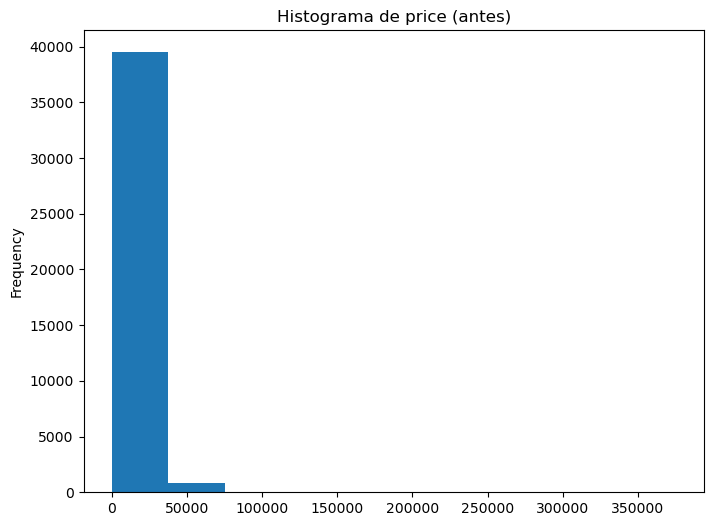

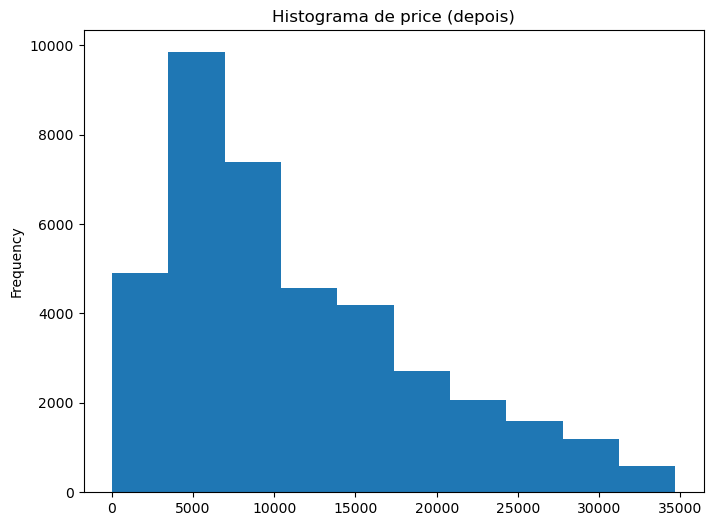

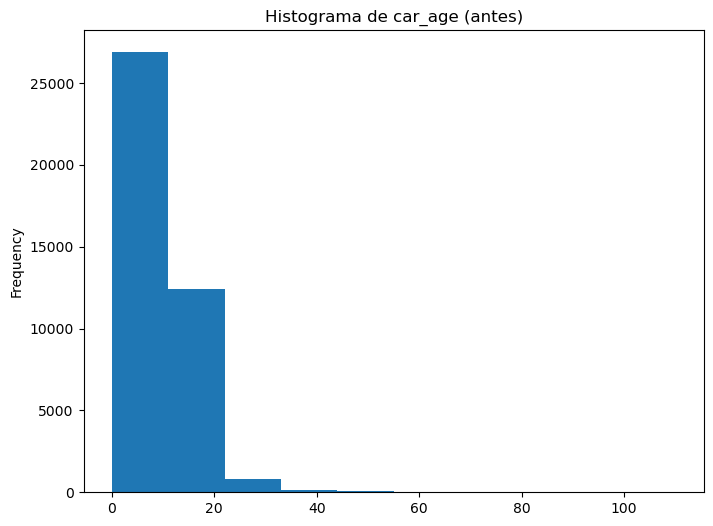

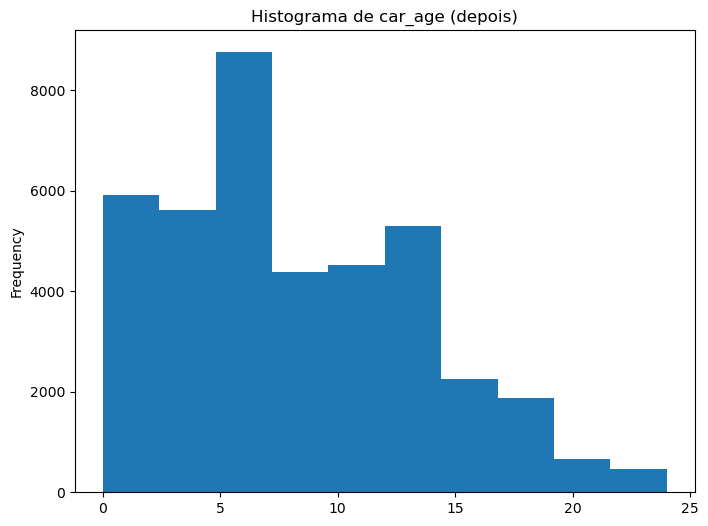

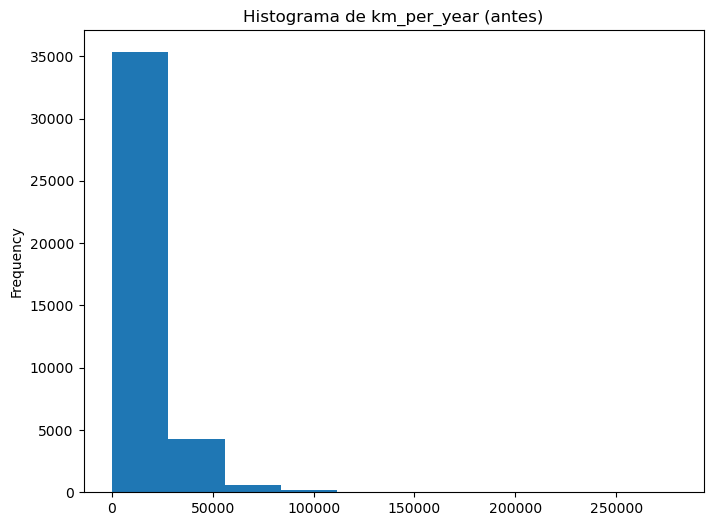

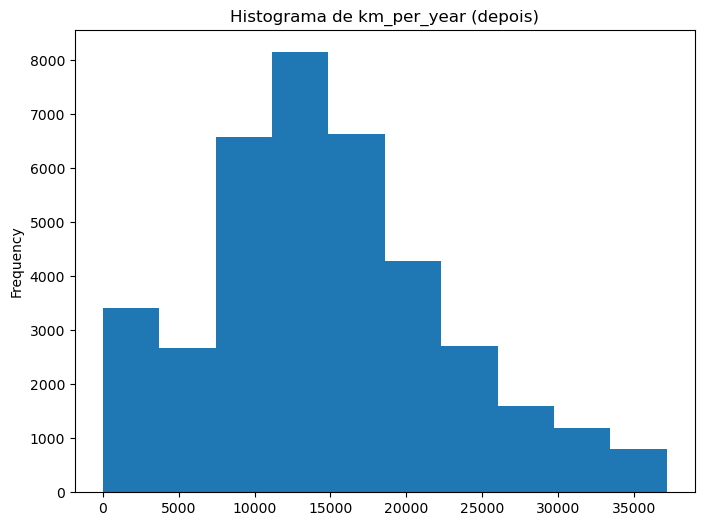

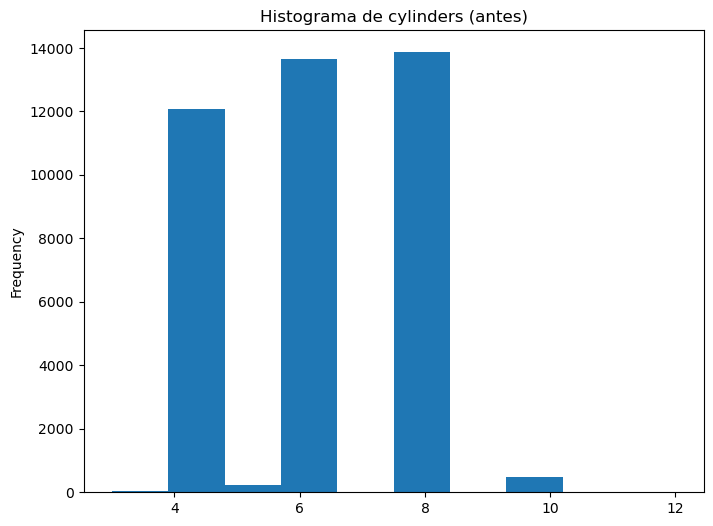

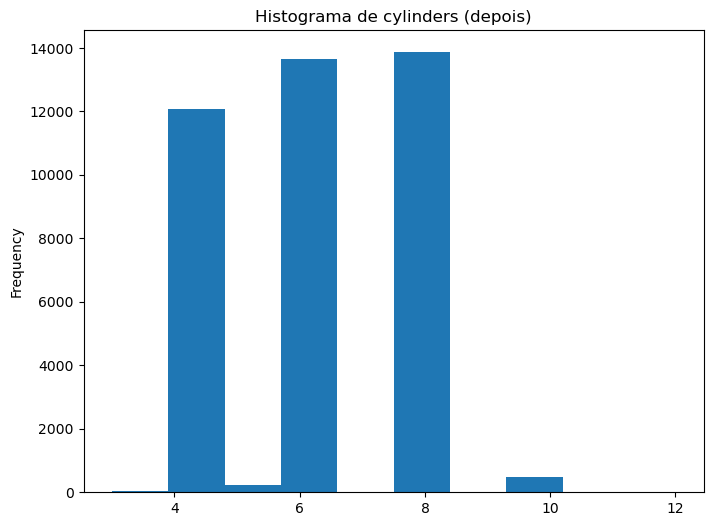

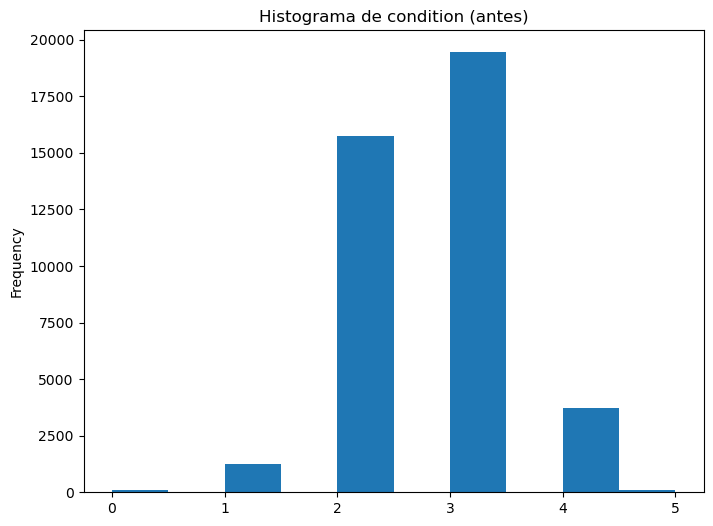

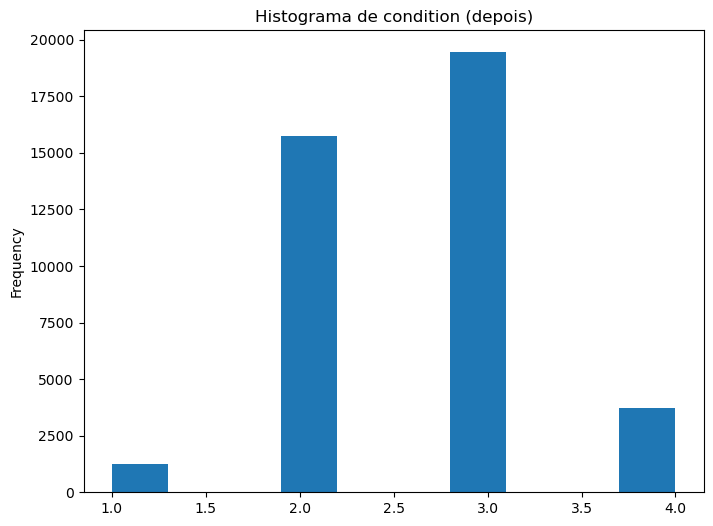

In [72]:
# Loop pelas colunas
for coluna in colunas:
    # Configurando a plotagem
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Histograma antes de tratar os valores atípicos
    df[coluna].plot(kind='hist', ax=ax, title=f'Histograma de {coluna} (antes)')
    
    # Identificando valores atípicos
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Filtrando os valores atípicos
    df_sem_atipicos = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    
    # Configurando a plotagem
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Histograma depois de remover os valores atípicos
    df_sem_atipicos[coluna].plot(kind='hist', ax=ax, title=f'Histograma de {coluna} (depois)')

    # Exibindo os histogramas
    plt.show()

Analisando as plotagens, vemos que o preço, a idade do carro e a media dos km rodados por ano os valores atipicos causam grandes alterações nos histogramas. 

Já os cilindros e a condição do carro não apresenta grandes mudanças com a remoção dos valores atipicos nos histogramas.

## Tempo de vida das propagandas

Irei analisar a quantidade de dias que cada propaganda ficou listada e tirar algumas conclusões sobre.

In [73]:
df['days_listed'].value_counts()

days_listed
24 days     763
18 days     739
22 days     732
16 days     719
13 days     718
           ... 
204 days      1
263 days      1
184 days      1
261 days      1
221 days      1
Name: count, Length: 214, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40373 entries, 0 to 40372
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   index         40373 non-null  int64          
 1   price         40373 non-null  int64          
 2   model_year    40373 non-null  datetime64[ns] 
 3   model         40373 non-null  object         
 4   condition     40373 non-null  int64          
 5   cylinders     40373 non-null  int8           
 6   fuel          40373 non-null  object         
 7   odometer      40373 non-null  int32          
 8   transmission  40373 non-null  object         
 9   type          40373 non-null  object         
 10  paint_color   40373 non-null  object         
 11  is_4wd        40373 non-null  int8           
 12  date_posted   40373 non-null  datetime64[ns] 
 13  days_listed   40373 non-null  timedelta64[ns]
 14  car_age       40373 non-null  int32          
 15  km_per_year   40373

In [75]:
df['days_listed_int'] = df['days_listed'].dt.days.astype(int)

<Axes: ylabel='Frequency'>

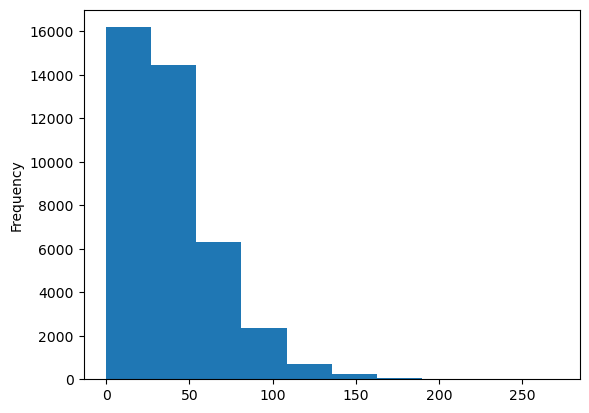

In [76]:
df['days_listed_int'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x2e62a9b3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e62a941250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e62a9b3a00>],
 'medians': [<matplotlib.lines.Line2D at 0x2e62a9ca070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e62a9ca310>],
 'means': []}

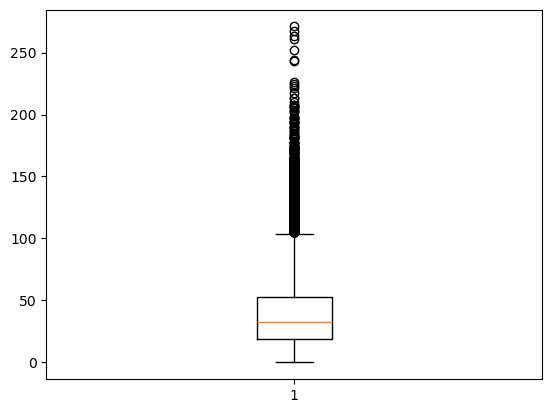

In [77]:
plt.boxplot(df['days_listed_int'])

In [78]:
df['days_listed_int'].describe()


count    40373.000000
mean        39.654274
std         28.128779
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed_int, dtype: float64

In [79]:
df.shape[0]

40373

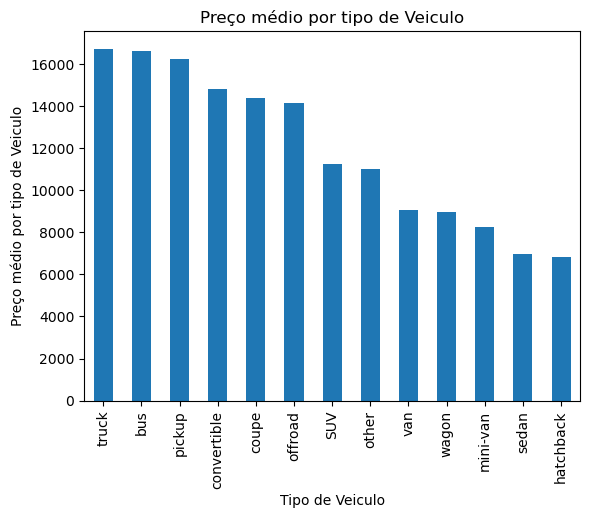

In [80]:
preco_medio_por_tipo = df.groupby('type')['price'].mean().sort_values(ascending=False)

preco_medio_por_tipo.plot(kind='bar')

plt.xlabel('Tipo de Veiculo')
plt.ylabel('Preço médio por tipo de Veiculo')

plt.title('Preço médio por tipo de Veiculo')

plt.show()

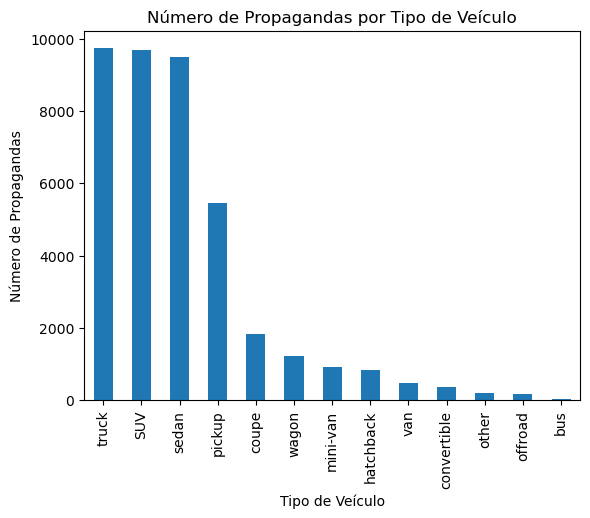

In [81]:
contagem_propagandas = df.groupby('type').size().sort_values(ascending=False)

contagem_propagandas.plot(kind='bar')

plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Propagandas')

plt.title('Número de Propagandas por Tipo de Veículo')

plt.show()

### Conclusões 

- O tempo de medio das propagandas são de 39 dias, a mediana é 33 dias. 

- As propagadas relativamente curtas foram retiradas em menos de 19 dias.

- As propagandas relativamente longas foram retiradas acima de 53 dias.


- A quantidade de propagandas no total foram de 40373.
- Os veiculos com mais propagandas são o tipo 'truck' e o tipo 'SUV'

- Os tipos de veiculos com mais propagandas foram o 'truck' e o 'SUV'.


## Fatores de preço

Irei analisar alguns fatores que impactam o preço dos carros usando alguns graficos de correlação.

In [82]:
carros_comuns = df['type'].value_counts().head(4).index.tolist()


In [83]:
df_filtrado = df[df['type'].isin(carros_comuns)]
df_filtrado['type'].value_counts()

type
truck     9732
SUV       9690
sedan     9486
pickup    5449
Name: count, dtype: int64

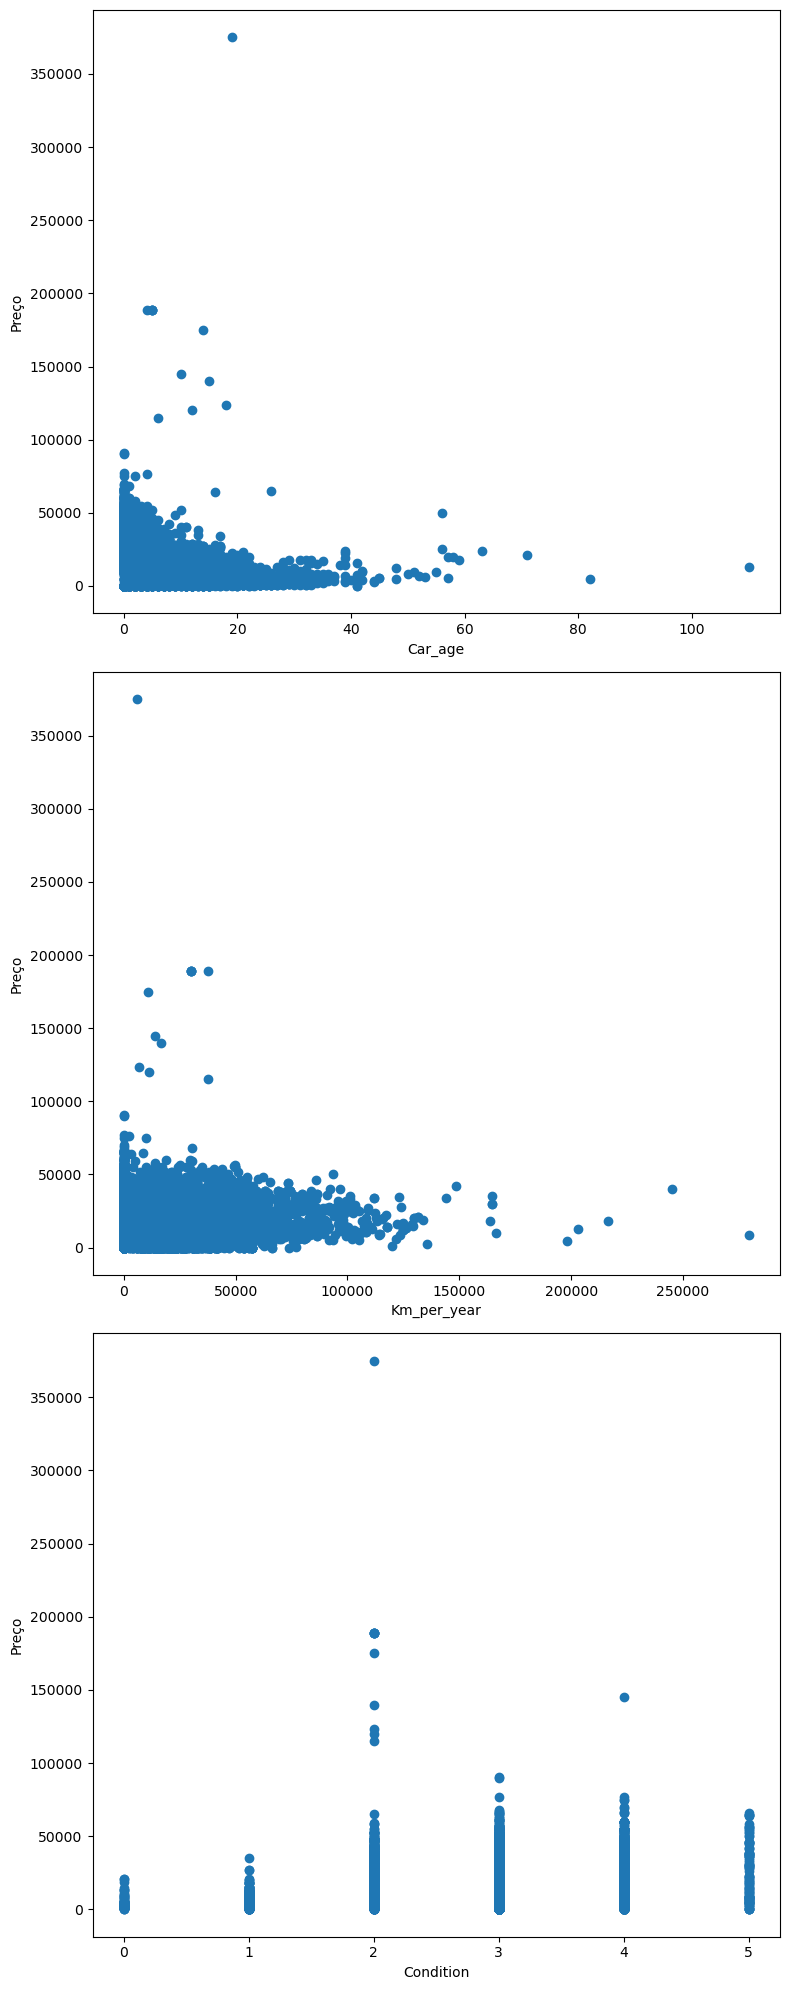

In [84]:
# Criar subplots para os gráficos de dispersão
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 20))

# Plotar gráficos de dispersão para cada fator em relação ao preço
for i, fator in enumerate(['car_age', 'km_per_year', 'condition']):
    axes[i].scatter(df_filtrado[fator], df_filtrado['price'])
    axes[i].set_xlabel(fator.capitalize())
    axes[i].set_ylabel('Preço')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

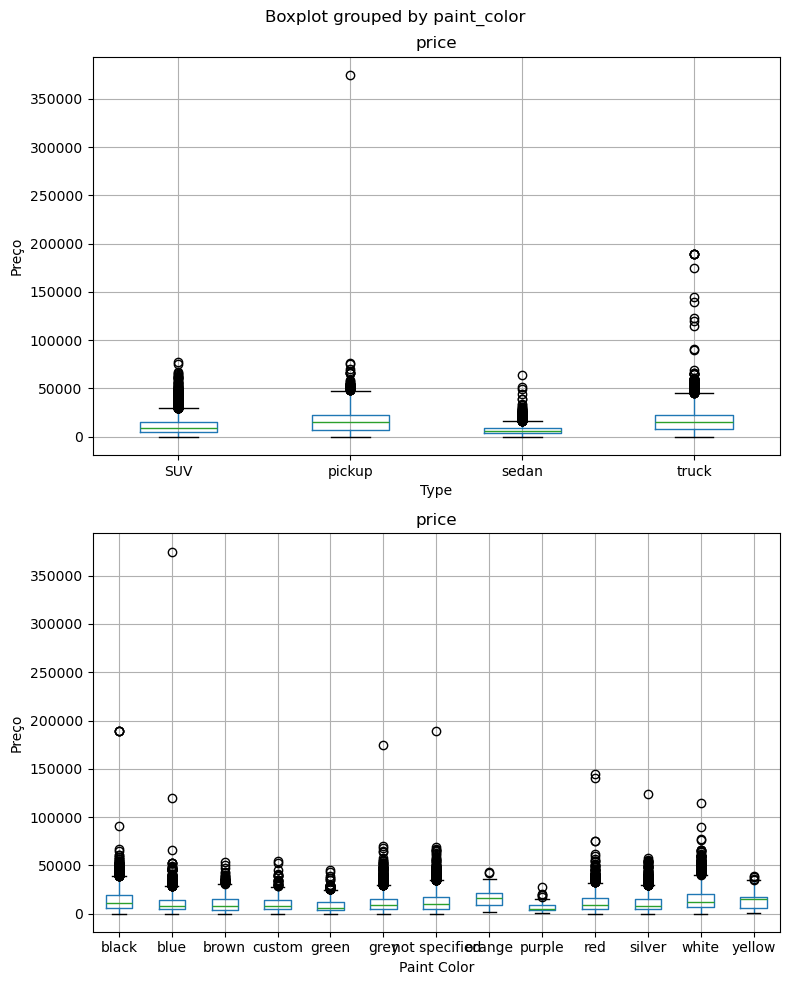

In [85]:
# Criar subplots para os gráficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plotar boxplot para o fator 'type'
df_filtrado.boxplot(column='price', by='type', ax=axes[0])
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Preço')

# Plotar boxplot para o fator 'paint_color'
df_filtrado.boxplot(column='price', by='paint_color', ax=axes[1])
axes[1].set_xlabel('Paint Color')
axes[1].set_ylabel('Preço')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir osb gráficos
plt.show()

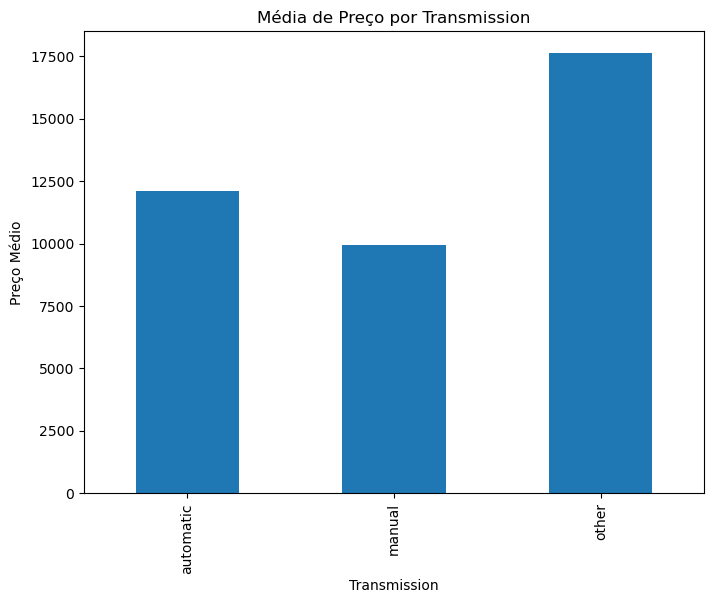

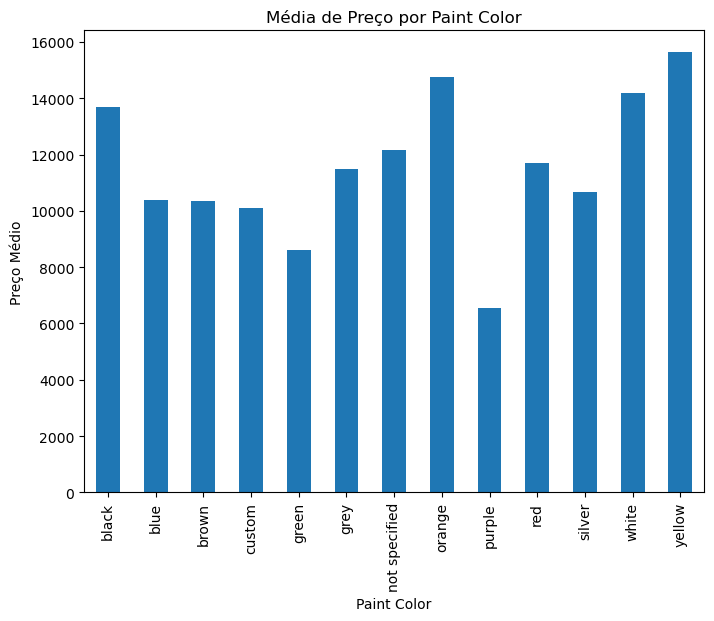

In [86]:
# Gráfico de barras para a variável "transmission"
plt.figure(figsize=(8, 6))
df.groupby('transmission')['price'].mean().plot(kind='bar')
plt.xlabel('Transmission')
plt.ylabel('Preço Médio')
plt.title('Média de Preço por Transmission')

# Gráfico de barras para a variável "paint_color"
plt.figure(figsize=(8, 6))
df.groupby('paint_color')['price'].mean().plot(kind='bar')
plt.xlabel('Paint Color')
plt.ylabel('Preço Médio')
plt.title('Média de Preço por Paint Color')

plt.show()

Os fatores que mais influenciam no preço dos carros são:

- A idade do carro: correlação negativa
- Os KM rodados: correlação negativa
- Se é tração nas 4 rodas: se for, o preço é maior
- A quantidade de cilindros: correlação negativa
- A condição do carro: quanto mais novo, maior o preço


- O carro ser manual ou não tambem influencia no valor do carro
- E a cor tambem, os carros com os maiores valores são os amarelos, e os menores são os roxos.

